In [6]:
import numpy as np
import matplotlib.pyplot as plt

## Analysis of Grouped method

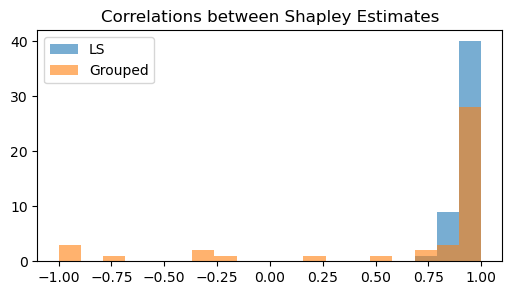

In [7]:
dataset = "bank"
method = "glm"

fname = '../Results/' + dataset + '_' + method
kshaps_indep = np.array(np.load(fname+'_kshap_indep.npy'))

pt_idx = 10
feat_idx = np.argsort(np.abs(kshaps_indep[pt_idx,0,6]))[::-1][0] # Most important feature, at least on point 0

n_pts, nsim_per_point, h, d = kshaps_indep.shape
corrs_ls = kshaps_indep[pt_idx,:,7, feat_idx] # Point 10, Feature index 0, 
corrs_grouped = kshaps_indep[pt_idx,:,5, feat_idx]

plt.figure(figsize=(6,3))
ax = plt.gca()
bins = np.linspace(np.nanmin([corrs_ls, corrs_grouped]), np.nanmax([corrs_ls, corrs_grouped]),20)

ax.hist(corrs_ls.reshape(-1), alpha=.6, bins=bins)
ax.hist(corrs_grouped.reshape(-1), alpha=.6, bins=bins)
plt.title("Correlations between Shapley Estimates")
plt.legend(["LS", "Grouped"], loc="upper left")
plt.savefig("../PaperFigs/grouped_kshap_corrs.png")
plt.show()

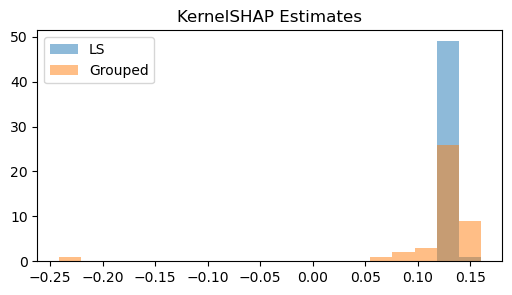

In [8]:
ests_ls = kshaps_indep[pt_idx,:,6, feat_idx] # Point 10, Feature index 0, 
ests_grouped = kshaps_indep[pt_idx,:,4, feat_idx]
ests_vanilla = kshaps_indep[pt_idx,:,0, feat_idx]
bins = np.linspace(np.nanmin([ests_grouped, ests_vanilla]), np.nanmax([ests_grouped, ests_vanilla]),20)
plt.figure(figsize=(6,3))
ax = plt.gca()
ax.hist(ests_ls.reshape(-1), alpha=.5, bins=bins)
ax.hist(ests_grouped.reshape(-1), alpha=.5, bins=bins)
plt.title("KernelSHAP Estimates")
plt.legend(["LS", "Grouped"], loc="upper left")
plt.savefig("../PaperFigs/grouped_kshap_ests.png")
plt.show()


- NA roughly 17\% of the time

In [9]:
kshaps_grouped = kshaps_indep[:,:,4, :]
np.sum(np.isnan(kshaps_grouped))/kshaps_grouped.reshape(-1).shape[0]

0.1665